In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
import copy
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
transcriptomics = CPTAC.get_transcriptomics()
transcriptomics_columns = CPTAC.get_transcriptomics_cols()

### Look at TP53 Transcriptomics, protein abundance

In [84]:
'''Look at ARID1A Mutation, effect on TP53'''
gene = "ARID1A"
protein = "TP53"

'''Look only at cancer patients'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)

'''Divide mutated and wildtype'''
mutateddf = genedf.loc[genedf["Mutation"] != "Wildtype"].dropna()
wtdf = genedf.loc[genedf["Mutation"] == "Wildtype"].dropna()

'''Run a ttest'''
ttest = scipy.stats.ttest_ind(mutateddf[protein], wtdf[protein])
p_value = ttest[1]
print("P Value: ", p_value)


P Value:  0.27824396156430403


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

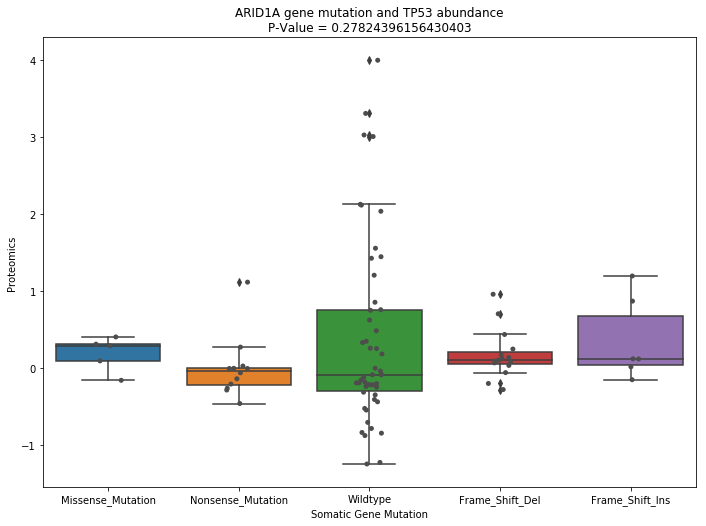

In [85]:
'''Now Plot the data'''
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(data=genedf, x="Mutation" ,y=protein)
boxplot.set_title(gene + " gene mutation and " + protein + " abundance" +"\nP-Value = "+ str(p_value))
boxplot = sns.stripplot(data=genedf, x="Mutation", y=protein,jitter=True, color=".3")
boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

In [86]:
'''Plot all mutated vs all wildtype'''
for i, row in genedf.iterrows():
    if row["Mutation"] != "Wildtype":
        #genedf.set_value(i, "Mutation", "Mutated")
        genedf.at[i, "Mutation"] = "Mutated"

#print(genedf)

[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

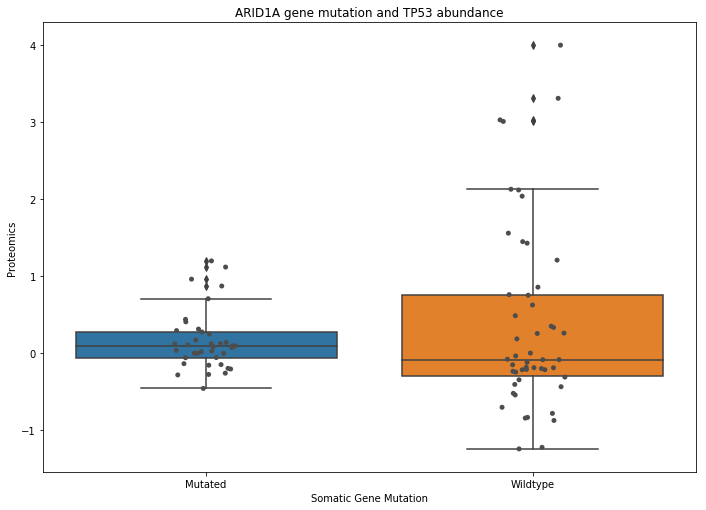

In [87]:
'''Now Plot the data'''
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(data=genedf, x="Mutation" ,y=protein)
boxplot.set_title(gene + " gene mutation and " + protein + " abundance")
boxplot = sns.stripplot(data=genedf, x="Mutation", y=protein,jitter=True, color=".3")
boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")


### Transcription

In [89]:
gene = "ARID1A"
protein = "TP53"
genedf = CPTAC.compare_mutations(transcriptomics, protein, gene)
#print(genedf)
genedf= genedf.loc[genedf["Patient_Type"]=="Tumor"].drop("Patient_Type", axis=1)

'''Divide mutated and wildtype'''
mutateddf = genedf.loc[genedf["Mutation"] != "Wildtype"]
wtdf = genedf.loc[genedf["Mutation"] == "Wildtype"]

'''Run a ttest'''
ttest = scipy.stats.ttest_ind(mutateddf[protein], wtdf[protein])
p_value = ttest[1]
print("P Value: ", p_value)



P Value:  0.00037328494313790787


[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

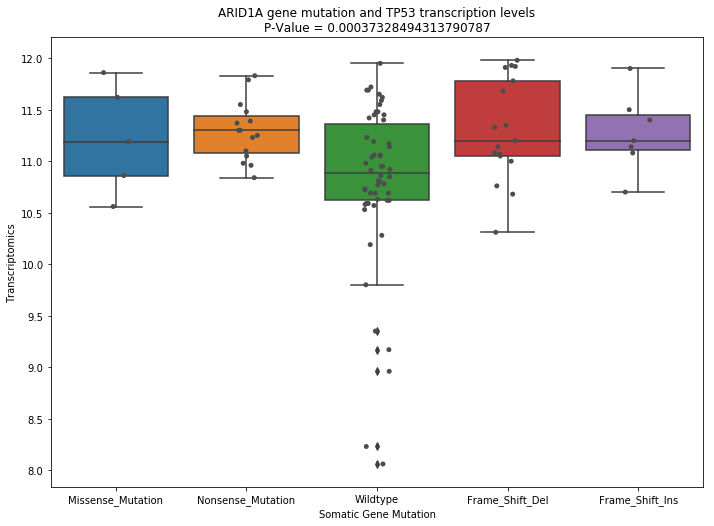

In [90]:
'''Now Plot the data'''
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(data=genedf, x="Mutation" ,y=protein, ax=ax)
boxplot.set_title(gene + " gene mutation and " + protein + " transcription levels" + "\nP-Value = " +str(p_value))
boxplot = sns.stripplot(data=genedf, x="Mutation", y=protein,jitter=True, color=".3")
boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Transcriptomics")


In [91]:
'''Plot all mutated vs all wildtype'''
for i, row in genedf.iterrows():
    if row["Mutation"] != "Wildtype":
        #genedf.set_value(i, "Mutation", "Mutated")
        genedf.at[i, "Mutation"] = "Mutated"

[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

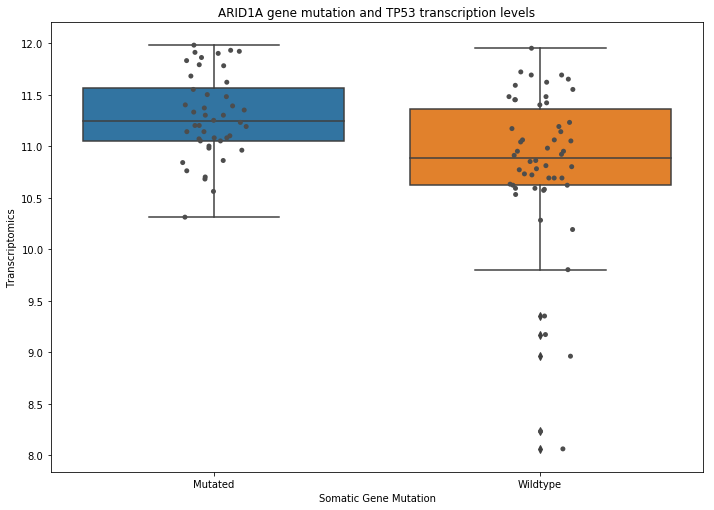

In [92]:
'''Now Plot the data'''
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(data=genedf, x="Mutation" ,y=protein, ax=ax)
boxplot.set_title(gene + " gene mutation and " + protein + " transcription levels")
boxplot = sns.stripplot(data=genedf, x="Mutation", y=protein,jitter=True, color=".3")
boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Transcriptomics")


